In [1]:
import os

In [1]:
import pandas as pd

In [2]:
wine=pd.read_csv("WineQT.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
import matplotlib.pyplot as plt

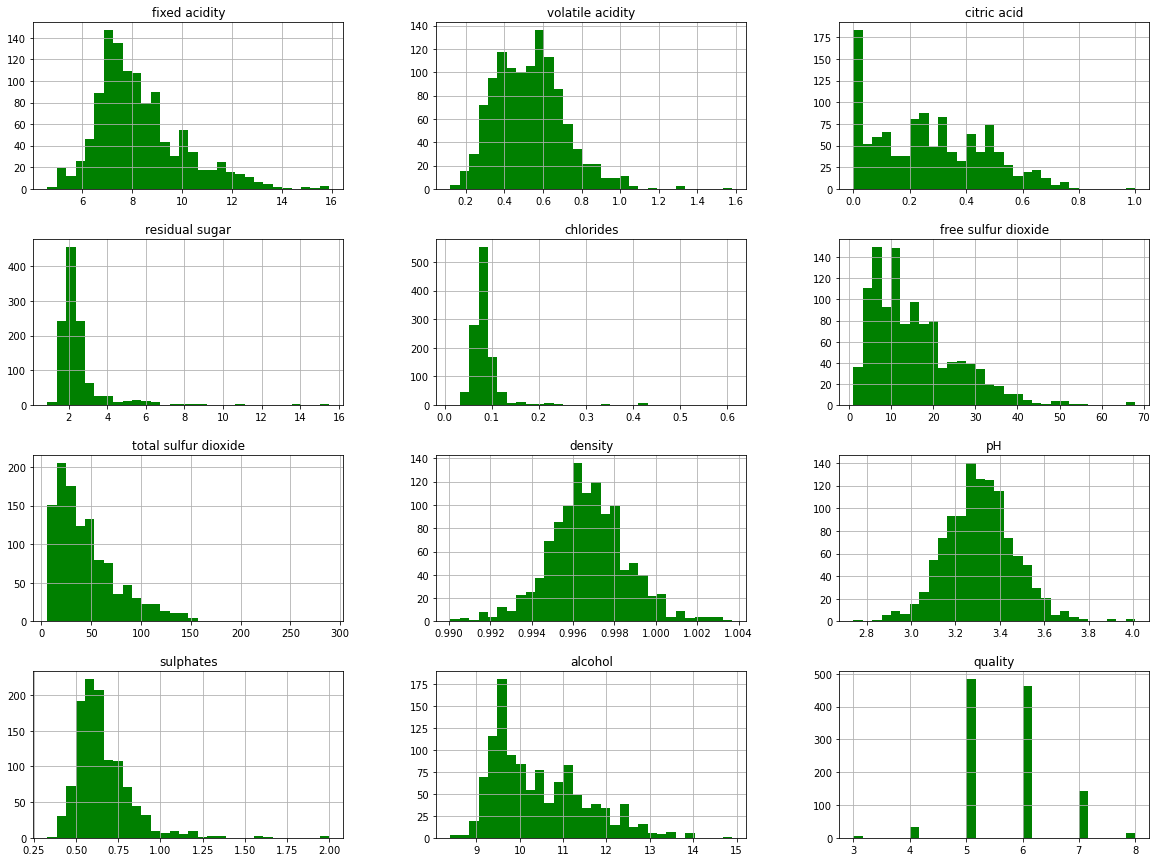

In [19]:
wine.hist(bins=30, figsize=(20,15),color="green")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=wine.drop(['quality'],axis=1)
y=wine['quality']

In [22]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

print(y_test.shape)

(914, 11)
(229, 11)
(914,)
(229,)


In [29]:
from sklearn.linear_model import ElasticNet

In [30]:
lr =ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
lr.fit(X_train,y_train)

ElasticNet(alpha=0.1, random_state=42)

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

In [35]:
def eval_metrics(actual,pred):
    rmse=np.sqrt(mean_squared_error(actual,pred))
    mae=mean_absolute_error(actual,pred)
    r2=r2_score(actual,pred)
    return rmse, mae, r2

In [34]:
predicted_value= lr.predict(X_test)

In [36]:
(rmse, mae, r2) =eval_metrics(y_test,predicted_value)

In [37]:
print("rmse =",rmse)
print("mae =",mae)
print("r2 score =",r2)

rmse = 0.6266607475209394
mae = 0.49955475814965256
r2 score = 0.29429873423592123
